In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *

## Dynamic objectives

In [2]:
rectangles = [((0.5, 4.), (2., 5.5))]
rectangle_vs = [(0.2, -0.2)]
target = np.array([1.2, 8.])
target_v = (0.1, 0.1)
S = [1.] * 3

objective = dynamic_inverse_kinematics_objectives(S, target, target_v, rectangles, rectangle_vs)

In [3]:
alphas = np.array([[1., 2., 1.5]])
objective(10, np.array([[1., 2., 1.5]]))

array([[89.09130996,  0.        ]])

In [5]:
alphas = np.array([[1., 2., 1.5]])
objective(0, np.array([[1., 2., 1.5]]))

array([[67.38045973,  0.        ]])

## Rectangle penalty tests

TODO: make into actual unit tests perhaps?

In [10]:
%%time
# x0 = 0.
# y0 = 1.5
# S = [0.9, 1., 0.9]
# alphas = -np.array([[np.pi / 2, -np.pi / 2, -np.pi / 2]])
x0 = 2.
y0 = 0.6
S = [1, 0.2, 3]
# alphas = np.array([[0, np.pi / 2, np.pi / 2]])
alphas = np.array([[np.pi, -np.pi / 2, -np.pi / 2]])
x, d = alphas_to_coords(S, x0, y0, alphas)
rect_x, rect_d = make_rectangle([-0.5, 0.5], [1.5, 1.0])
x, d, rect_x, rect_d

CPU times: user 438 µs, sys: 288 µs, total: 726 µs
Wall time: 494 µs


(array([[[2. , 0.6],
         [1. , 0.6],
         [1. , 0.8],
         [4. , 0.8]]]),
 array([[[-1.0000000e+00,  1.2246468e-16],
         [ 1.2246468e-17,  2.0000000e-01],
         [ 3.0000000e+00,  0.0000000e+00]]]),
 array([[-0.5,  0.5],
        [-0.5,  0.5],
        [ 1.5,  1. ],
        [ 1.5,  1. ]]),
 array([[ 2. ,  0. ],
        [ 0. ,  0.5],
        [-2. , -0. ],
        [-0. , -0.5]]))

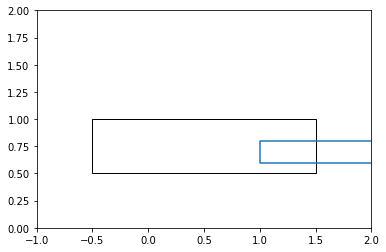

In [11]:
rect = patches.Rectangle(rect_x[0, :], rect_d[0, 0], rect_d[1, 1], edgecolor="k", facecolor=(0, 0, 0, 0))
fig, ax = plt.subplots()
ax.set_xlim(-1, 2.)
ax.set_ylim(0., 2.)
ax.add_patch(rect)
ax.plot(x[0, :, 0], x[0, :, 1])

In [12]:
%%time
rectangle_total_penalty(x, d, rect_x, rect_d)

CPU times: user 1.98 ms, sys: 1.14 ms, total: 3.11 ms
Wall time: 3.02 ms


/home/i291318/Dynamic-inverse-kinematics/simulation.py:23: RuntimeWarning: divide by zero encountered in true_divide
  t = vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:24: RuntimeWarning: divide by zero encountered in true_divide
  u = vector_product(x2 - x1, d1) / rs


array([0.0500125])

## Misc

In [17]:
S = [1, 0.5, 0.5]
x0 = 0.
y0 = 0.
alphas = np.array([[np.pi / 4., -np.pi / 2., np.pi - np.pi / 6.]])

In [18]:
x, dx = alphas_to_coords(S, x0, y0, alphas)
x, dx

(array([[[0.        , 0.        ],
         [0.70710678, 0.70710678],
         [1.06066017, 0.35355339],
         [0.93125065, 0.8365163 ]]]),
 array([[[ 0.70710678,  0.70710678],
         [ 0.35355339, -0.35355339],
         [-0.12940952,  0.48296291]]]))

(-0.05303300858899107,
 1.1136931803688124,
 -0.041825815186890394,
 0.8783421189246983)

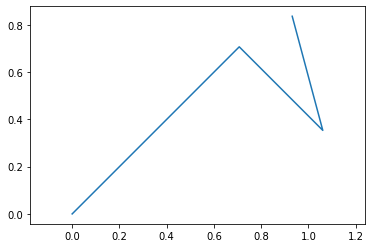

In [19]:
plt.plot(x[0, :, 0], x[0, :, 1])
plt.axis("equal")

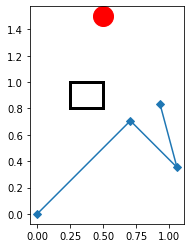

In [33]:
draw_solutions(alphas, S, 0.5, 1.5, [((0.25, 0.8), [0.5, 1.0])])

In [142]:
make_rectangle(
    np.array([1., 1.]),
    np.array([2., 3.])
)

(array([[1., 1.],
        [1., 1.],
        [2., 3.],
        [2., 3.]]),
 array([[ 1.,  0.],
        [ 0.,  2.],
        [-1., -0.],
        [-0., -2.]]))

In [143]:
x1 = np.array([[0, 1],
               [0, 0.4]])
d1 = np.array([[0.66667, -0.66667],
               [0.2, -0.4]])
x2 = np.array([[0, 0],
               [0, 0.8]])
d2 = np.array([[1, 1],
               [0.2, 0.2]])

In [144]:
intersects = intersect(x1, d1, x2, d2)
intersects.shape

(2, 2, 2)

In [145]:
does_intersect = np.any(~np.isnan(intersects), (1, 2))
does_intersect

array([ True,  True])

In [146]:
intersects[0, 0]

array([0.74999625, 0.5       ])

In [147]:
intersects[0, 1]

array([0.14999925, 0.5       ])

In [148]:
intersects[1, 0]

array([0.66666667, 0.13333333])

In [149]:
intersects[1, 1]

array([nan, nan])

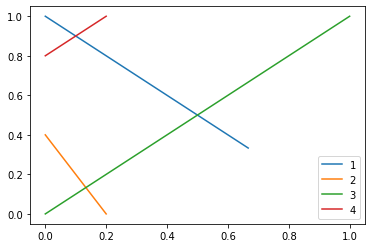

In [150]:
l1 = np.vstack([x1[0, :], x1[0, :]+d1[0, :]])
l2 = np.vstack([x1[1, :], x1[1, :]+d1[1, :]])
l3 = np.vstack([x2[0, :], x2[0, :]+d2[0, :]])
l4 = np.vstack([x2[1, :], x2[1, :]+d2[1, :]])

plt.plot(l1[:, 0], l1[:, 1], label="1")
plt.plot(l2[:, 0], l2[:, 1], label="2")
plt.plot(l3[:, 0], l3[:, 1], label="3")
plt.plot(l4[:, 0], l4[:, 1], label="4")
plt.legend()